In [2]:
from PIL import Image
import os, sys
os.chdir('C:/Users/admin/Desktop/Assignment 05 - Neural Networks and Evaluating Results/NeuralNetwork1/Training')

path = "C:/Users/admin/Desktop/Assignment 05 - Neural Networks and Evaluating Results/NeuralNetwork1/Training"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((20,20), Image.ANTIALIAS)
            imResize.save(f + ' resized.jpg', 'JPEG', quality=90)

resize()

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import re

# Pillow
import PIL
from PIL import Image

In [4]:
# Use Pillow library to convert an input jpeg to a 8 bit grey scale image array for processing.
def jpeg_to_8_bit_greyscale(path, maxsize):
        img = Image.open(path).convert('L')   # convert image to 8-bit grayscale
        # Make aspect ratio as 1:1, by applying image crop.
    # Please note, croping works for this data set, but in general one
    # needs to locate the subject and then crop or scale accordingly.
        WIDTH, HEIGHT = img.size
        if WIDTH != HEIGHT:
                m_min_d = min(WIDTH, HEIGHT)
                img = img.crop((0, 0, m_min_d, m_min_d))
        # Scale the image to the requested maxsize by Anti-alias sampling.
        img.thumbnail(maxsize, PIL.Image.ANTIALIAS)
        return np.asarray(img)

In [5]:
def load_image_dataset(path_dir, maxsize):
        images = []
        labels = []
        os.chdir(path_dir)
        for file in glob.glob("*.jpg"):
                img = jpeg_to_8_bit_greyscale(file, maxsize)
                if re.match('acc.*', file):
                        images.append(img)
                        labels.append(0)
                elif re.match('clef.*', file):
                        images.append(img)
                        labels.append(1)
        return (np.asarray(images), np.asarray(labels))

In [6]:
maxsize = 20, 20


In [8]:
(train_images, train_labels) = load_image_dataset('C:/Users/admin/Desktop/Assignment 05 - Neural Networks and Evaluating Results/NeuralNetwork1/Training', maxsize)

(test_images, test_labels) = load_image_dataset('C:/Users/admin/Desktop/Assignment 05 - Neural Networks and Evaluating Results/NeuralNetwork1/Training', maxsize)

In [9]:
class_names = ['accidental', 'clef']

In [10]:
train_images.shape

(0,)

In [11]:
test_images.shape

(0,)

In [12]:
print(train_labels)

[]


In [13]:
test_images.shape

(0,)

In [14]:
print(train_labels)

[]


In [15]:
print(test_labels)

[]


In [16]:
def display_images(images, labels):
        plt.figure(figsize=(10,10))
        grid_size = min(25, len(images))
        for i in range(grid_size):
                plt.subplot(5, 5, i+1)
                plt.xticks([])
                plt.yticks([])
                plt.grid(False)
                plt.imshow(images[i], cmap=plt.cm.binary)
                plt.xlabel(class_names[labels[i]])

In [17]:
display_images(test_images, test_labels)
plt.show()

<Figure size 720x720 with 0 Axes>

In [18]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [19]:
# Setting up the layers.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 20)),
        keras.layers.Dense(128, activation=tf.nn.sigmoid),
        keras.layers.Dense(16, activation=tf.nn.sigmoid),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [20]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.7, nesterov=True)

model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.fit(train_images, train_labels, epochs=100)

ValueError: Error when checking input: expected flatten_1_input to have 3 dimensions, but got array with shape (0, 1)

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)


ValueError: Error when checking input: expected flatten_1_input to have 3 dimensions, but got array with shape (0, 1)

In [226]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8556391


In [227]:
predictions = model.predict(test_images)

In [228]:
print(predictions)

[[9.9928349e-01 7.1654777e-04]
 [9.9878949e-01 1.2105176e-03]
 [9.6336108e-01 3.6638908e-02]
 ...
 [1.6177610e-02 9.8382241e-01]
 [3.9842942e-01 6.0157055e-01]
 [1.8440239e-02 9.8155975e-01]]


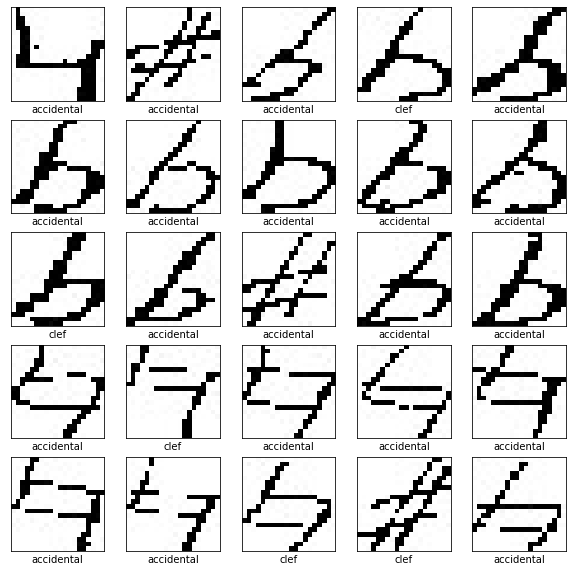

In [229]:
display_images(test_images, np.argmax(predictions, axis = 1))
plt.show()